In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-evd-bauerfike)


```{index} Julia; adjoint, Julia; \'
```

We first define a hermitian matrix. Note that the `'` operation is the adjoint and includes complex conjugation.

In [2]:
n = 7
A = randn(n, n) + 1im * randn(n, n)
A = (A + A') / 2

7×7 Matrix{ComplexF64}:
  -1.33773+0.0im        -1.40498+0.274737im  …   -0.88622+0.428919im
  -1.40498-0.274737im    1.54433+0.0im          -0.957641+1.72591im
 -0.547607+0.112812im   0.610048-0.882355im      0.719371-0.055089im
  0.735252-0.322994im  -0.681845+0.517563im       1.34087-0.844757im
  0.396945+0.186079im  -0.524699+0.214198im      0.795729-0.426007im
  0.775117-0.723136im  -0.211307+0.349153im  …  -0.575138+0.145604im
  -0.88622-0.428919im  -0.957641-1.72591im        0.95134+0.0im

```{index} Julia; cond
```

We confirm that the matrix $\mathbf{A}$ is normal by checking that $\kappa(\mathbf{V}) = 1$ (to within roundoff).

In [3]:
λ, V = eigen(A)
@show cond(V);

cond(V) = 1.0000000000000007

Now we perturb $\mathbf{A}$ and measure the effect on the eigenvalues. The Bauer–Fike theorem uses absolute differences, not relative ones.
```{tip}
:class: dropdown
Since the ordering of eigenvalues can change, we look at all pairwise differences and take the minima.
```

In [4]:
ΔA = 1e-8 * normalize(randn(n, n) + 1im * randn(n, n))
λ̃ = eigvals(A + ΔA)
dist = minimum([abs(x - y) for x in λ̃, y in λ], dims=2)

7×1 Matrix{Float64}:
 1.147856326864485e-9
 7.959684499390172e-10
 1.4912142408188525e-9
 1.8678404196368593e-9
 1.6658532719844407e-9
 2.8736513234011905e-9
 2.0369268576557904e-9

As promised, the perturbations in the eigenvalues do not exceed the normwise perturbation to the original matrix.

Now we see what happens for a triangular matrix.

In [5]:
n = 20
x = 1:n
A = triu(x * ones(n)')
A[1:5, 1:5]

5×5 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0
 0.0  2.0  2.0  2.0  2.0
 0.0  0.0  3.0  3.0  3.0
 0.0  0.0  0.0  4.0  4.0
 0.0  0.0  0.0  0.0  5.0

This matrix is not especially close to normal.

In [6]:
λ, V = eigen(A)
@show cond(V);

cond(V) = 6.149906664929389e9

As a result, the eigenvalues can change by a good deal more.

In [7]:
ΔA = 1e-8 * normalize(randn(n, n) + 1im * randn(n, n))
λ̃ = eigvals(A + ΔA)
dist = minimum([abs(x - y) for x in λ̃, y in λ], dims=2)
BF_bound = cond(V) * norm(ΔA)
@show maximum(dist), BF_bound;

(maximum(dist), BF_bound) = (0.18571621514371348, 61.4990666492939)

If we plot the eigenvalues of many perturbations, we get a cloud of points that roughly represents all the possible eigenvalues when representing this matrix with single-precision accuracy.

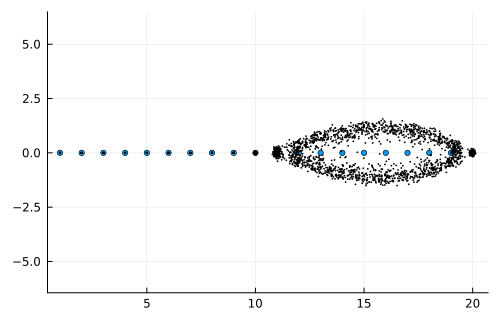

In [8]:
plt = scatter(λ, zeros(n), aspect_ratio=1)
for _ in 1:200
    ΔA = eps(Float32) * normalize(randn(n, n) + 1im * randn(n, n))
    λ̃ = eigvals(A + ΔA)
    scatter!(real(λ̃), imag(λ̃), m=1, color=:black)
end
plt

The plot shows that some eigenvalues are much more affected than others. This situation is not unusual, but it is not explained by the Bauer–Fike theorem.